In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
db = pd.read_csv('../10ac_week1/data.csv', na_values=['?', None])
db.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,...,"15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,...,"20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,...,"19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,...,"21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,700,928.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,...,"15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00","38,542,814.00","569,138,589.00"


In [155]:
# column names
db.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Before Cleaning a dataset, you need to explore what has been stored in it. The column names, how many data points,
number of colum etc. All these questions needs to be answered

For better understanding of the columns, Exploring the data description [here](https://docs.google.com/spreadsheets/d/1pcNqeUeIph6xAQzlI54KCvi8HM91SUNeeDbdOq3rvbE/edit#gid=784155610) will help

## Handling Missing Values

In [157]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The telecom data dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(db)

The telecom data dataset contains 12.5 % missing values.


In [158]:
# Now which column(s) has missing values
db.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

Well, Looks like some columns has alot of missing values.

Up Next How to fix missing values

Fixing Missing values is a crucial part of any data science/ML project because you might be making the data better by your method or otherwise. So your decision has to be perfect or close enough.

The rule of thumb is for all object datatype kind of column/features use the mode method to fill the missing datapoints and for number kind of features use the mean/median method.

The question now is how to choose which method to fill a number feature with. Well the simple answer is check if it is skewed. Now what is skew?

Back to the rule of thumb, if the data is not skewed, filling with either mean or median will work well. But if it is indeed skew, then fill with Median. The idea is ....

Other method of dealing with missing values exists like fill-forward,backward-fill etc

You also need to consider what the column represent before you fill missing values for example:  ...

Another easy way to do this is to just drop all misisng rows and moving on with analysis if you have data left atleast.

In [159]:
# To see the percentage of missing values of every columns
def every_column_percent_missing(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_db = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})

    missing_value_db.sort_values('percent_missing', inplace=True)

    print(missing_value_db)


every_column_percent_missing(db)

                                                                       column_name  \
Youtube DL (Bytes)                                              Youtube DL (Bytes)   
Other UL (Bytes)                                                  Other UL (Bytes)   
Other DL (Bytes)                                                  Other DL (Bytes)   
Gaming UL (Bytes)                                                Gaming UL (Bytes)   
Gaming DL (Bytes)                                                Gaming DL (Bytes)   
Netflix UL (Bytes)                                              Netflix UL (Bytes)   
Netflix DL (Bytes)                                              Netflix DL (Bytes)   
Youtube UL (Bytes)                                              Youtube UL (Bytes)   
Email UL (Bytes)                                                  Email UL (Bytes)   
Email DL (Bytes)                                                  Email DL (Bytes)   
Google UL (Bytes)                                     

In [160]:
# drop columns with more than 30% missing values
df_clean = db.drop(
['Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)' ], axis=1)
df_clean.shape

(150001, 45)

In [161]:
df_clean.isna().sum()

Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [162]:

percent_missing(df_clean)

The telecom data dataset contains 1.02 % missing values.


In [163]:
#df_clean['# fill missing with ffill method for columns ()

def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]


def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

df_clean['Dur. (ms).1'] = fix_missing_ffill(df_clean, 'Dur. (ms).1')
df_clean['Activity Duration DL (ms)'] = fix_missing_ffill(df_clean, 'Activity Duration DL (ms)')
df_clean['Activity Duration UL (ms)'] = fix_missing_ffill(df_clean, 'Activity Duration UL (ms)')
df_clean['Total UL (Bytes)'] = fix_missing_ffill(df_clean, 'Total UL (Bytes)')
df_clean['Total DL (Bytes)'] = fix_missing_ffill(df_clean, 'Total DL (Bytes)')
df_clean['Avg Bearer TP DL (kbps)'] = fix_missing_ffill(df_clean, 'Avg Bearer TP DL (kbps)')
df_clean['Start'] = fix_missing_ffill(df_clean, 'Start')
df_clean['Start ms'] = fix_missing_ffill(df_clean, 'Start ms')
df_clean['End'] = fix_missing_ffill(df_clean, 'End')
df_clean['Avg Bearer TP UL (kbps)'] = fix_missing_ffill(df_clean, 'Avg Bearer TP UL (kbps)')
df_clean['End ms'] = fix_missing_ffill(df_clean, 'End ms')
df_clean['Dur. (ms)'] = fix_missing_ffill(df_clean, 'Dur. (ms)')
df_clean['IMSI'] = fix_missing_ffill(df_clean, 'IMSI')
df_clean['DL TP > 1 Mbps (%)'] = fix_missing_ffill(df_clean, 'DL TP > 1 Mbps (%)')
df_clean['250 Kbps < DL TP < 1 Mbps (%)'] = fix_missing_ffill(df_clean, '250 Kbps < DL TP < 1 Mbps (%)')
df_clean['50 Kbps < DL TP < 250 Kbps (%)'] = fix_missing_ffill(df_clean, '50 Kbps < DL TP < 250 Kbps (%)')
df_clean['DL TP < 50 Kbps (%)'] = fix_missing_ffill(df_clean, 'DL TP < 50 Kbps (%)')
df_clean['Nb of sec with Vol DL < 6250B'] = fix_missing_ffill(df_clean, 'Nb of sec with Vol DL < 6250B')
df_clean['10 Kbps < UL TP < 50 Kbps (%)'] = fix_missing_ffill(df_clean, '10 Kbps < UL TP < 50 Kbps (%)')
df_clean['UL TP < 10 Kbps (%)'] = fix_missing_ffill(df_clean, 'UL TP < 10 Kbps (%)')
df_clean['UL TP > 300 Kbps (%)'] = fix_missing_ffill(df_clean, 'UL TP > 300 Kbps (%)')
df_clean['50 Kbps < UL TP < 300 Kbps (%)'] = fix_missing_ffill(df_clean, '50 Kbps < UL TP < 300 Kbps (%)')
df_clean['Nb of sec with Vol UL < 1250B'] = fix_missing_ffill(df_clean, 'Nb of sec with Vol UL < 1250B')
df_clean['Bearer Id'] = fix_missing_ffill(df_clean, 'Bearer Id')
df_clean['Last Location Name'] = fix_missing_ffill(df_clean, 'Last Location Name')

# fill 'Handset Type, Handset Manufacturer, IMEI & MSISDN/Number' column with mode 
df_clean['Handset Manufacturer'] = df_clean['Handset Manufacturer'].fillna(df_clean['Handset Manufacturer'].mode()[0])
df_clean['Handset Type'] = df_clean['Handset Type'].fillna(df_clean['Handset Type'].mode()[0])
df_clean['IMEI'] = df_clean['IMEI'].fillna(df_clean['IMEI'].mode()[0])
df_clean['MSISDN/Number'] = df_clean['MSISDN/Number'].fillna(df_clean['MSISDN/Number'].mode()[0])

Other missing columns can be fixed based on your understanding, you can decide to drop or fill using appropriate methods. Whichever you decide, explain your reasons  

## Transforming Data

**Scaling and Normalization**

Scaling vs. Normalization: What's the difference?

One of the reasons that it's easy to get confused between scaling and normalization is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that:

    - in scaling, you're changing the range of your data, while
    - in normalization, you're changing the shape of the distribution of your data.

Scaling

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points are, like support vector machines (SVM) or k-nearest neighbors (KNN). With these algorithms, a change of "1" in any numeric feature is given the same importance.

For example, you might be looking at the prices of some products in both Yen and US Dollars. One US Dollar is worth about 100 Yen, but if you don't scale your prices, methods like SVM or KNN will consider a difference in price of 1 Yen as important as a difference of 1 US Dollar! This clearly doesn't fit with our intuitions of the world. With currency, you can convert between currencies. But what about if you're looking at something like height and weight? It's not entirely clear how many pounds should equal one inch (or how many kilograms should equal one meter).




In [164]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# generate 1000 data points randomly drawn from an exponential distribution
original_data = pd.DataFrame(np.random.exponential(200, size=2000))

original_data.sample(5)

,0
70,5.15
193,46.76
95,44.33
756,145.53
1352,19.08


In [165]:
original_data[0].min(), original_data[0].max()

(0.14641093080797243, 2270.783988394508)

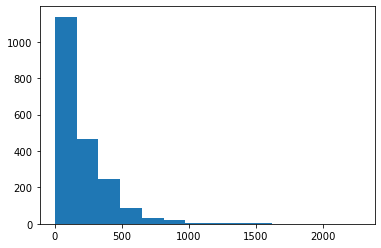

In [166]:
count, bins, ignored = plt.hist(original_data, 14)
plt.show()

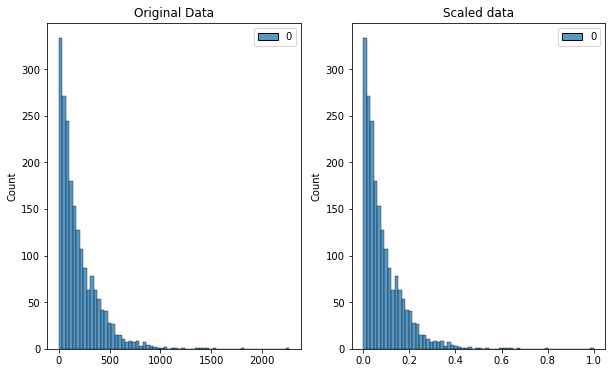

In [167]:
# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    fig, ax = plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(original_data, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1])
    ax[1].set_title("Scaled data")
    
scaler(original_data)

Normalization

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

    Normal distribution: Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, you'll normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

The method you will be using to normalize here is called the Normalizer method from sklearn. Let's take a quick peek at what normalizing some data looks like:

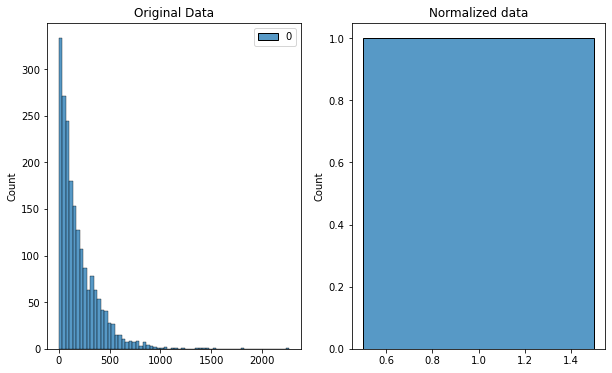

In [168]:
from sklearn.preprocessing import Normalizer

def normalizer(df):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")

normalizer(original_data)

In [169]:
# check datatypes
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150001 non-null  object 
 2   Start ms                        150001 non-null  float64
 3   End                             150001 non-null  object 
 4   End ms                          150001 non-null  float64
 5   Dur. (ms)                       150001 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg RTT DL (ms)                 122172 non-null  float64
 11  Avg RTT UL (ms)                 122189 non-null  float64
 12  Avg Bearer TP DL

<AxesSubplot:>

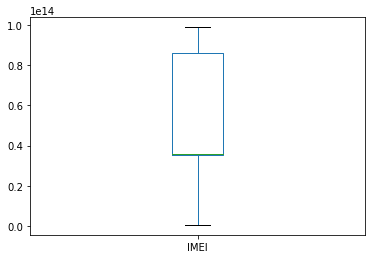

In [170]:

df_clean['IMEI'].plot.box()

In [171]:

#Counting Handset Manufacturers
df_clean['Handset Manufacturer'].value_counts().head(3)

Apple      60137
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [172]:
#Counting Handset Types
top10 = df_clean['Handset Type'].value_counts().head(10)

top10.head(10)

Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

<AxesSubplot:ylabel='Handset Type'>

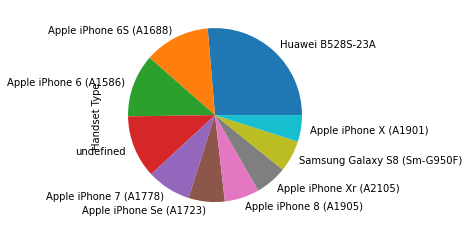

In [173]:
top10.plot.pie()

<AxesSubplot:>

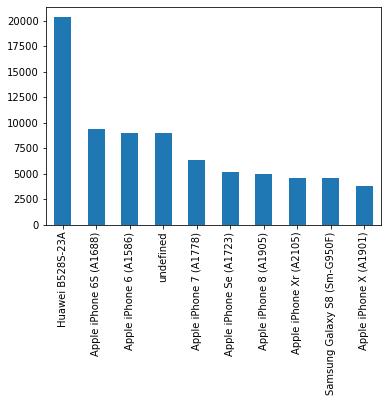

In [174]:
top10.plot.bar()

In [175]:
top_apple = df_clean.groupby('Handset Manufacturer')['Handset Type'].value_counts()['Apple'].head(5)
top_apple
#top_apple.plot.bar()

Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64

In [176]:
top_samsung = df_clean.groupby('Handset Manufacturer')['Handset Type'].value_counts()['Samsung'].head(5)
top_samsung
#top_samsung.plot.bar()

Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64

In [177]:
top_huawei = df_clean.groupby('Handset Manufacturer')['Handset Type'].value_counts()['Huawei'].head(5)
top_huawei
#top_huawei.plot.bar()

Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64

In [178]:
sessions = df_clean.groupby('MSISDN/Number').agg({'Bearer Id': 'count'})
sessions = sessions.rename(columns= {'Bearer Id': 'xDR_sessions'})
sessions.sort_values(by=['xDR_sessions'], ascending = False).head(10)

,xDR_sessions
MSISDN/Number,
"33,626,320,676.00",1084
"33,625,779,332.00",17
"33,614,892,860.00",17
"33,659,725,664.00",16
"33,760,536,639.00",15
"33,675,877,202.00",15
"33,667,163,239.00",13
"33,627,080,969.00",12
"33,604,515,716.00",12


In [179]:
durations = df_clean.groupby('MSISDN/Number').agg({'Dur. (ms)': 'sum'})
#here is the duration for first five rows in our dataset
durations=durations.rename(columns= {'Dur. (ms)': 'total_duration(ms)'})
durations.sort_values(by=['total_duration(ms)'], ascending = False).head(10)

,total_duration(ms)
MSISDN/Number,
"33,626,320,676.00","81,336,233.00"
"33,625,779,332.00","18,553,754.00"
"33,614,892,860.00","9,966,898.00"
"33,760,536,639.00","9,279,434.00"
"33,667,163,239.00","8,744,914.00"
"33,662,840,755.00","6,614,270.00"
"33,664,693,736.00","6,288,730.00"
"33,603,127,838.00","6,287,761.00"
"33,667,456,716.00","5,649,882.00"


In [180]:
total_data_df = df_clean[['MSISDN/Number','Total UL (Bytes)','Total DL (Bytes)']].copy()
total_data_df = total_data_df.groupby('MSISDN/Number').sum()
total_data_df['total_data(bytes)'] = total_data_df['Total UL (Bytes)'] + total_data_df['Total DL (Bytes)']
total_data_df.sort_values(by=['total_data(bytes)'], ascending = False).head(10)

,Total UL (Bytes),Total DL (Bytes),total_data(bytes)
MSISDN/Number,,,
"33,626,320,676.00","45,024,579,099.00","494,597,054,786.00","539,621,633,885.00"
"33,614,892,860.00","689,483,001.00","8,156,743,493.00","8,846,226,494.00"
"33,760,536,639.00","703,478,581.00","7,811,295,382.00","8,514,773,963.00"
"33,625,779,332.00","729,577,380.00","7,770,043,342.00","8,499,620,722.00"
"33,675,877,202.00","581,568,792.00","7,309,541,816.00","7,891,110,608.00"
"33,659,725,664.00","624,260,321.00","7,081,602,462.00","7,705,862,783.00"
"33,666,464,084.00","405,060,976.00","6,903,439,962.00","7,308,500,938.00"
"33,760,413,819.00","521,518,890.00","6,610,851,624.00","7,132,370,514.00"
"33,664,712,899.00","471,244,453.00","6,400,773,755.00","6,872,018,208.00"


In [181]:
df_clean["social_media"] = df_clean["Social Media DL (Bytes)"] + df_clean['Social Media UL (Bytes)']
df_clean["google"] = df_clean["Google DL (Bytes)"] + df_clean["Google UL (Bytes)"]
df_clean['email'] = df_clean["Email DL (Bytes)"] + df_clean["Email UL (Bytes)"]
df_clean['youtube'] = df_clean["Youtube DL (Bytes)"] + df_clean["Youtube UL (Bytes)"]
df_clean['netflix'] = df_clean["Netflix DL (Bytes)"] + df_clean["Netflix UL (Bytes)"]
df_clean["gaming"] = df_clean["Gaming DL (Bytes)"] + df_clean["Gaming UL (Bytes)"]
df_clean['other']= df_clean["Other DL (Bytes)"]+ df_clean["Other UL (Bytes)"]
df_clean['total_data'] = df_clean['Total UL (Bytes)'] + df_clean['Total UL (Bytes)']


In [182]:
app_total_data = df_clean[['MSISDN/Number','social_media','google',
                             'email', 'youtube','netflix', 'gaming','other']].copy()

In [183]:
app_total_data.groupby('MSISDN/Number').sum().sample(10)

,social_media,google,email,youtube,netflix,gaming,other
MSISDN/Number,,,,,,,
"33,761,464,273.00","3,515,195.00","8,164,605.00","2,324,930.00","29,720,936.00","11,485,464.00","612,931,000.00","695,333,774.00"
"33,615,645,107.00","624,850.00","10,612,136.00","2,873,926.00","21,864,013.00","32,474,405.00","650,654,889.00","809,625,168.00"
"33,752,348,476.00","3,622,874.00","7,307,593.00","286,327.00","13,319,458.00","18,217,923.00","846,861,885.00","142,327,895.00"
"33,665,313,367.00","1,104,493.00","9,257,238.00","1,307,404.00","30,856,981.00","22,798,933.00","148,722,910.00","597,311,952.00"
"33,762,626,479.00","3,244,155.00","3,426,133.00","3,625,729.00","27,772,321.00","23,014,946.00","162,645,622.00","844,353,601.00"
"33,615,650,063.00","2,261,308.00","9,011,131.00","2,260,674.00","17,354,776.00","14,165,245.00","58,218,913.00","815,288,560.00"
"33,669,397,769.00","1,396,657.00","5,234,601.00","2,174,128.00","32,067,620.00","25,371,745.00","227,989,581.00","270,594,653.00"
"33,665,164,651.00","1,307,283.00","3,002,832.00","951,959.00","29,435,908.00","21,181,588.00","87,344,180.00","244,860,256.00"
"33,618,081,486.00","1,523,047.00","18,853,388.00","4,949,825.00","29,039,362.00","47,609,097.00","947,096,448.00","437,457,224.00"


## Utility Functions

In [184]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150001 non-null  object 
 2   Start ms                        150001 non-null  float64
 3   End                             150001 non-null  object 
 4   End ms                          150001 non-null  float64
 5   Dur. (ms)                       150001 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg RTT DL (ms)                 122172 non-null  float64
 11  Avg RTT UL (ms)                 122189 non-null  float64
 12  Avg Bearer TP DL

In [185]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

def format_float(value):
    return f'{value:,.2f}'

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df

def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]


###################################PLOTTING FUNCTIONS###################################

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


pd.options.display.float_format = format_float

## Extracting Data

In [186]:
db['Google DL (Bytes)'].value_counts()

6,296,014.00    3
9,003,594.00    3
3,991,481.00    3
6,839,538.00    3
7,696,054.00    3
               ..
5,512,483.00    1
1,612,609.00    1
4,376,316.00    1
4,764,816.00    1
294,305.00      1
Name: Google DL (Bytes), Length: 149024, dtype: int64

In [187]:
percent_missing(df_clean)

The telecom data dataset contains 0.7 % missing values.


In [188]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150001 non-null  object 
 2   Start ms                        150001 non-null  float64
 3   End                             150001 non-null  object 
 4   End ms                          150001 non-null  float64
 5   Dur. (ms)                       150001 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg RTT DL (ms)                 122172 non-null  float64
 11  Avg RTT UL (ms)                 122189 non-null  float64
 12  Avg Bearer TP DL

In [189]:
df_explore = df_clean[['Handset Manufacturer', 'Handset Type', 'Dur. (ms)', 
                                 'social_media', 'google', 'email', 'youtube', 'netflix',
                                 'gaming','other', 'total_data'
                                ]]

In [190]:
df_explore.head()

,Handset Manufacturer,Handset Type,Dur. (ms),social_media,google,email,youtube,netflix,gaming,other,total_data
0,Samsung,Samsung Galaxy A5 Sm-A520F,"1,823,652.00","1,570,185.00","2,905,912.00","3,701,304.00","18,355,943.00","17,855,187.00","292,426,453.00","180,558,843.00","73,499,482.00"
1,Samsung,Samsung Galaxy J5 (Sm-J530),"1,365,104.00","1,933,278.00","4,414,096.00","937,385.00","39,359,124.00","35,565,545.00","609,920,783.00","541,959,383.00","107,600,782.00"
2,Samsung,Samsung Galaxy A8 (2018),"1,361,762.00","1,726,277.00","10,229,119.00","3,363,124.00","34,425,237.00","23,751,202.00","229,980,251.00","414,908,351.00","55,767,276.00"
3,undefined,undefined,"1,321,509.00","657,493.00","11,811,761.00","2,070,983.00","36,534,765.00","15,092,588.00","810,387,875.00","761,837,216.00","86,648,436.00"
4,Samsung,Samsung Sm-G390F,"1,089,009.00","912,788.00","7,748,843.00","2,110,349.00","34,222,253.00","17,539,799.00","531,237,049.00","564,619,822.00","77,085,628.00"


In [191]:
#Converting byte data into megabytes
def convert_bytes_to_megabytes(df, bytes_data):

        megabyte = 1*10e+5
        megabyte_col = df[bytes_data] / megabyte

        return megabyte_col

In [192]:

df_explore['social_media'] = convert_bytes_to_megabytes(df_explore, 'social_media')

df_explore['google'] = convert_bytes_to_megabytes(df_explore, 'google')

df_explore['email'] = convert_bytes_to_megabytes(df_explore, 'email')

df_explore['youtube'] = convert_bytes_to_megabytes(df_explore, 'youtube')

df_explore['netflix'] = convert_bytes_to_megabytes(df_explore, 'netflix')

df_explore['gaming'] = convert_bytes_to_megabytes(df_explore, 'gaming')

df_explore['total_data'] = convert_bytes_to_megabytes(df_explore, 'total_data')

df_explore['other'] = convert_bytes_to_megabytes(df_explore, 'other')

<ipython-input-192-1be746749a83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_explore['social_media'] = convert_bytes_to_megabytes(df_explore, 'social_media')
<ipython-input-192-1be746749a83>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_explore['google'] = convert_bytes_to_megabytes(df_explore, 'google')
<ipython-input-192-1be746749a83>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [193]:
#Univarent non graphical analysis
quntitative_df = df_explore[['Dur. (ms)', 'social_media', 'google', 'email', 'youtube', 'netflix',
                                 'gaming', 'total_data' ]]

In [194]:
quntitative_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Dur. (ms),"150,001.00","104,608.52","81,037.35","7,142.00","57,442.00","86,399.00","132,430.00","1,859,336.00"
social_media,"150,001.00",1.83,1.04,0.00,0.93,1.83,2.73,3.65
google,"150,001.00",7.81,3.52,0.04,4.94,7.81,10.68,15.53
email,"150,001.00",2.26,1.07,0.01,1.36,2.26,3.16,4.52
youtube,"150,001.00",22.64,9.25,0.08,16.00,22.66,29.29,45.19
netflix,"150,001.00",22.63,9.26,0.10,15.98,22.64,29.29,45.20
gaming,"150,001.00",430.33,244.02,0.31,218.73,431.61,641.42,859.20
total_data,"150,001.00",82.24,22.55,5.73,66.44,82.29,98.07,156.66


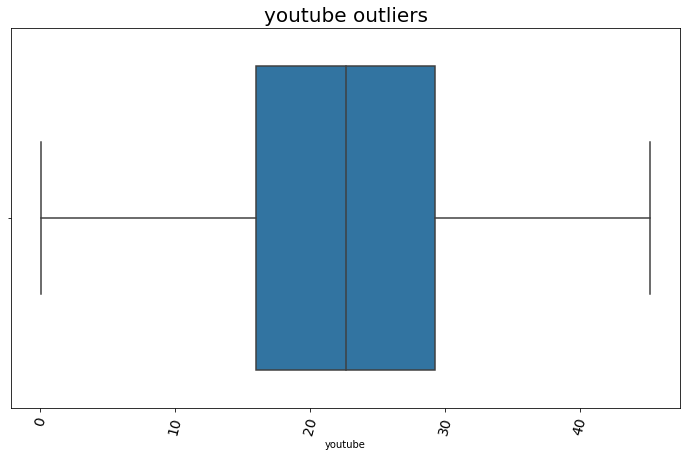

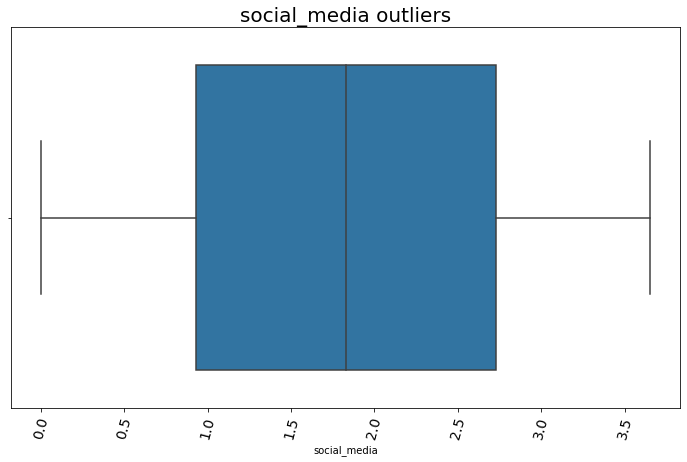

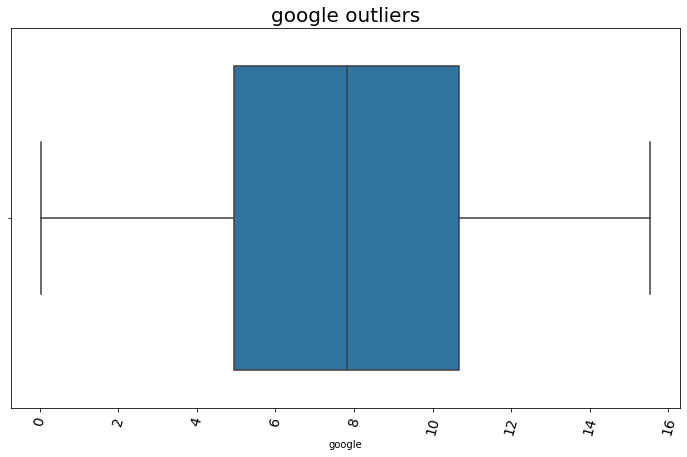

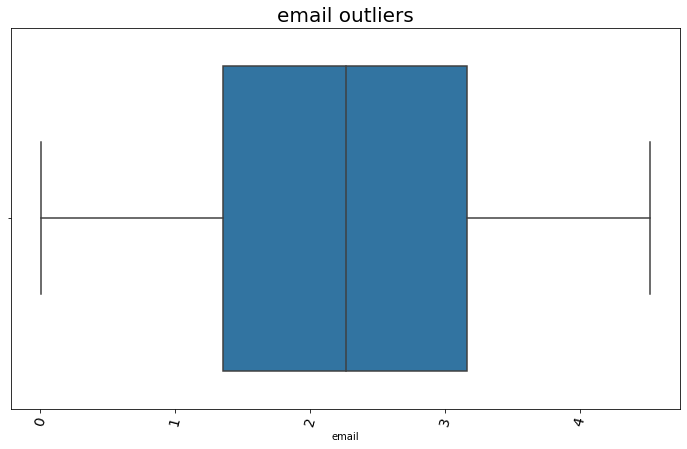

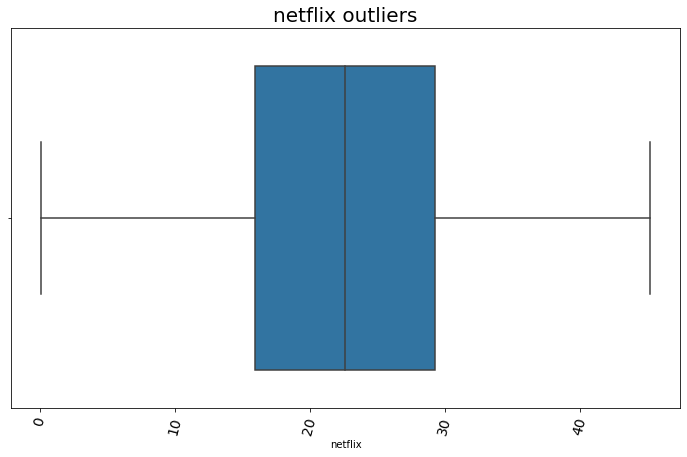

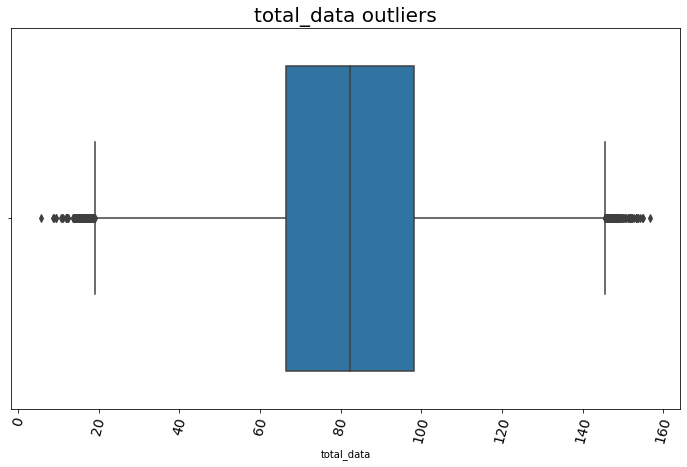

In [195]:
#Univarent graphical analysis
#Checking for Outliers

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()
    
plot_box(quntitative_df, "youtube", "youtube outliers")

plot_box(quntitative_df, "social_media", "social_media outliers")

plot_box(quntitative_df, "google", "google outliers")

plot_box(quntitative_df, "email", "email outliers")

plot_box(quntitative_df, "netflix", "netflix outliers")

plot_box(quntitative_df, "total_data", "total_data outliers")

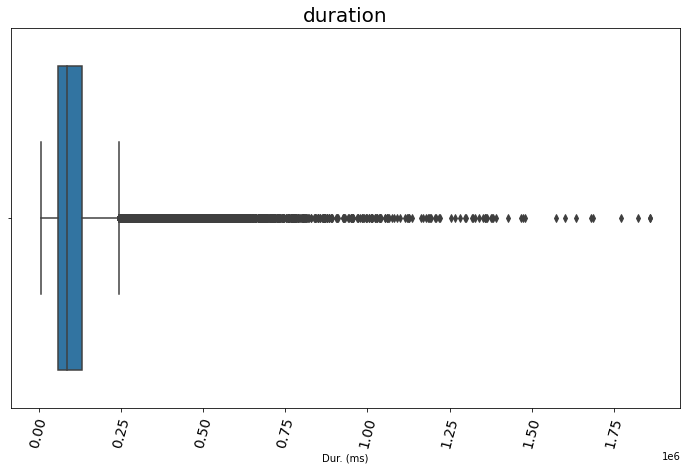

In [196]:
plot_box(quntitative_df, "Dur. (ms)", "duration")

<ipython-input-197-46defdc0b648>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quntitative_df['Dur. (ms)'] = np.where(quntitative_df['Dur. (ms)'] > quntitative_df['Dur. (ms)'].quantile(0.95),


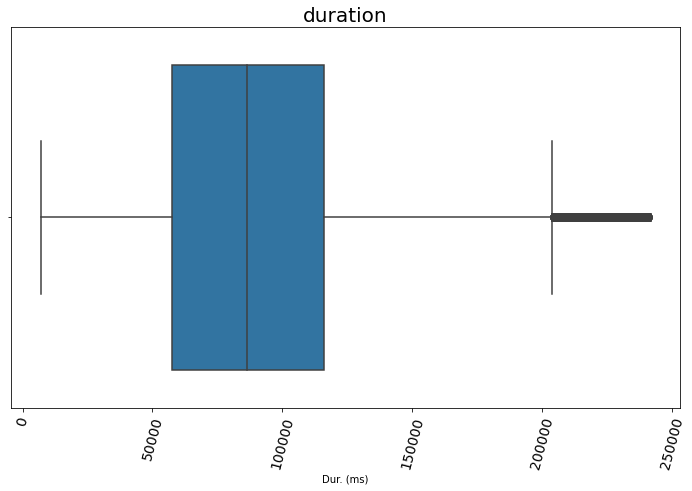

In [197]:
quntitative_df['Dur. (ms)'] = np.where(quntitative_df['Dur. (ms)'] > quntitative_df['Dur. (ms)'].quantile(0.95),
                                         quntitative_df['Dur. (ms)'].mode(),quntitative_df['Dur. (ms)'])
plot_box(quntitative_df, "Dur. (ms)", "duration")

<Figure size 648x504 with 0 Axes>

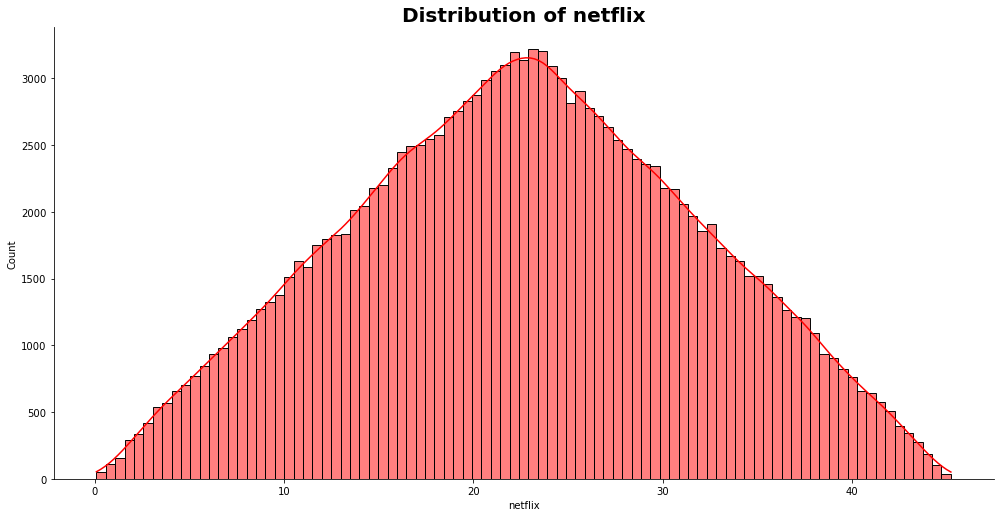

<Figure size 648x504 with 0 Axes>

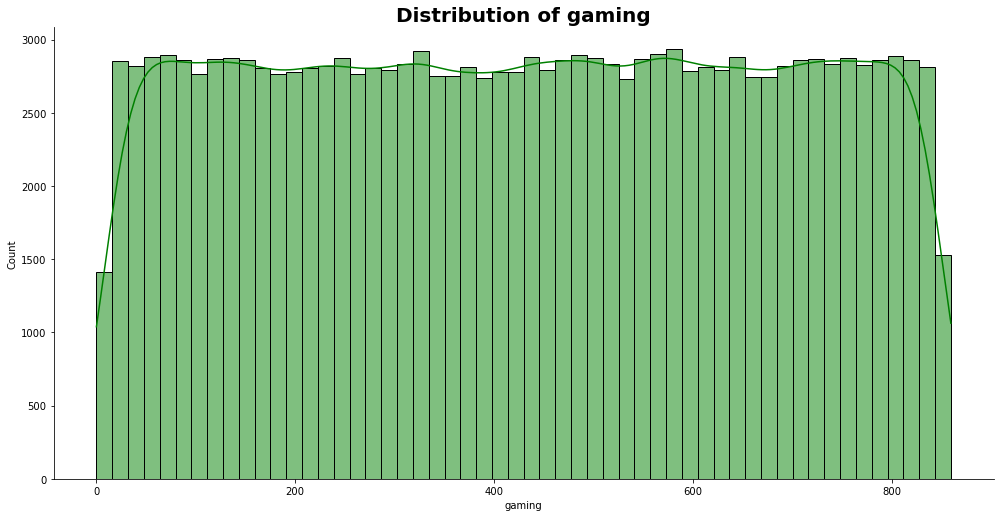

<Figure size 648x504 with 0 Axes>

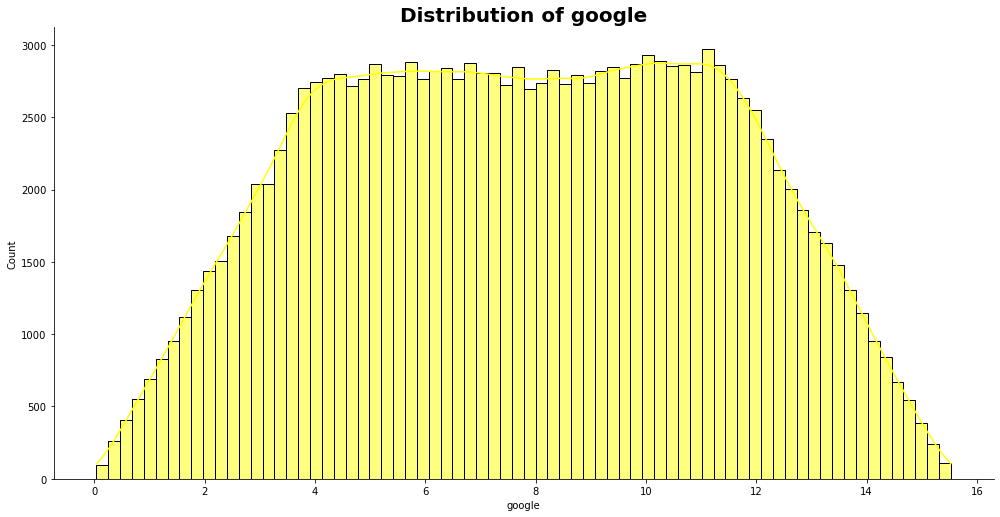

<Figure size 648x504 with 0 Axes>

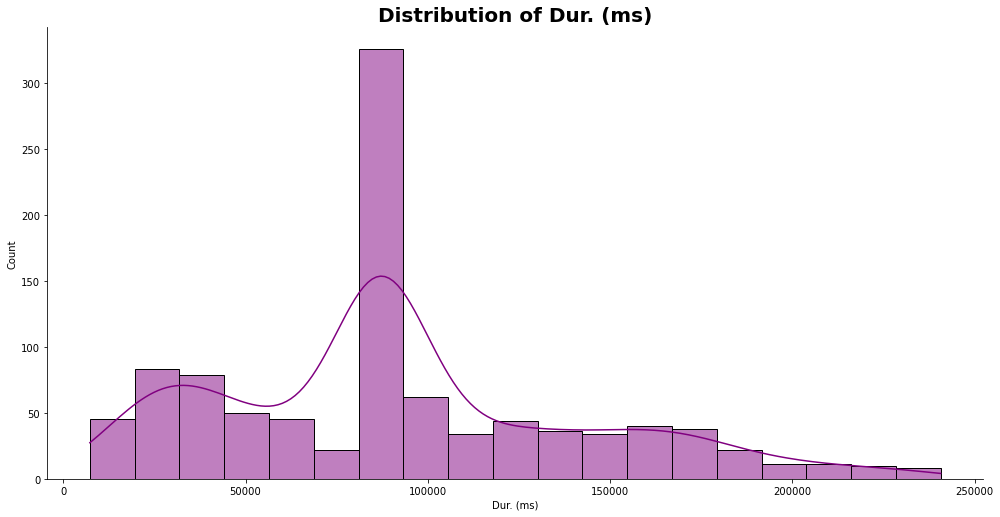

<Figure size 648x504 with 0 Axes>

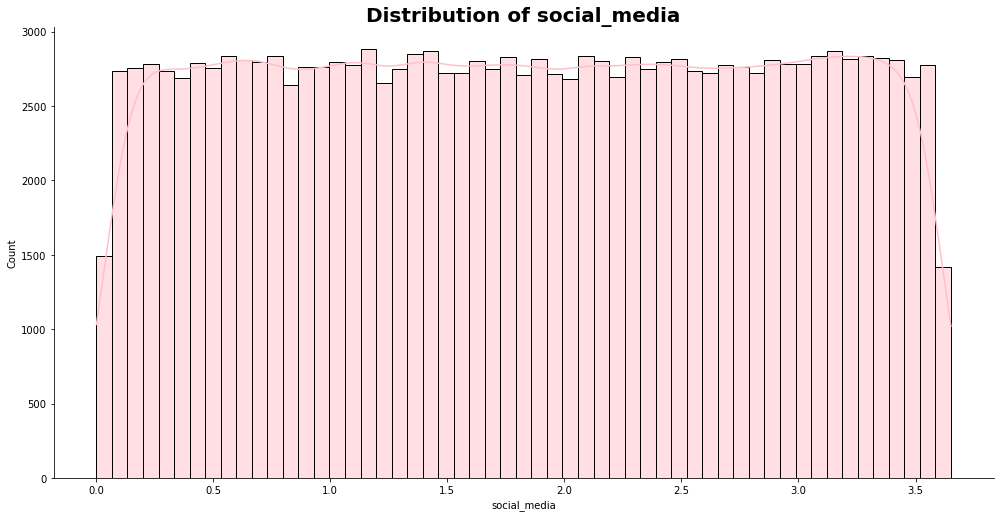

<Figure size 648x504 with 0 Axes>

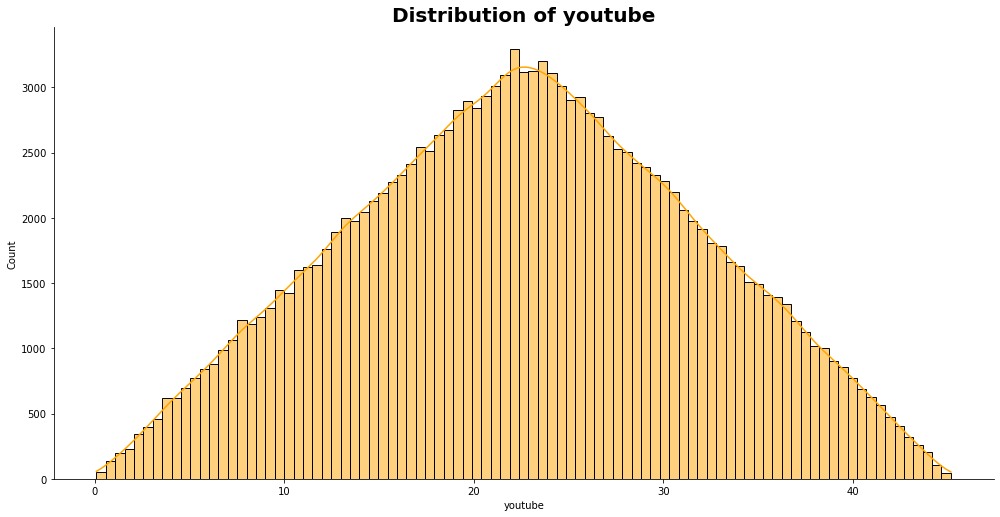

<Figure size 648x504 with 0 Axes>

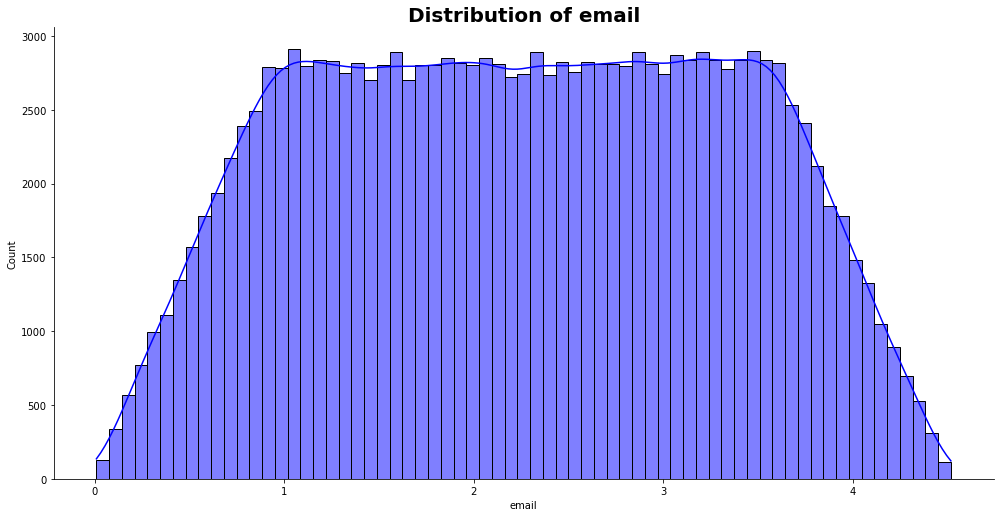

In [198]:
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    plt.figure(figsize=(9, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
    
plot_hist(quntitative_df, 'netflix', color='red')

plot_hist(quntitative_df, 'gaming', color='green')

plot_hist(quntitative_df, 'google', color='yellow')

plot_hist(quntitative_df.sample(1000), 'Dur. (ms)', color='purple')

plot_hist(quntitative_df, 'social_media', color='pink')

plot_hist(quntitative_df, 'youtube', color='orange')

plot_hist(quntitative_df, 'email', color='blue')

In [199]:
dfExp = df_clean.copy()
dfExp

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Total UL (Bytes),Total DL (Bytes),social_media,google,email,youtube,netflix,gaming,other,total_data
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,...,"36,749,741.00","308,879,636.00","1,570,185.00","2,905,912.00","3,701,304.00","18,355,943.00","17,855,187.00","292,426,453.00","180,558,843.00","73,499,482.00"
1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,...,"53,800,391.00","653,384,965.00","1,933,278.00","4,414,096.00","937,385.00","39,359,124.00","35,565,545.00","609,920,783.00","541,959,383.00","107,600,782.00"
2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,...,"27,883,638.00","279,807,335.00","1,726,277.00","10,229,119.00","3,363,124.00","34,425,237.00","23,751,202.00","229,980,251.00","414,908,351.00","55,767,276.00"
3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,...,"43,324,218.00","846,028,530.00","657,493.00","11,811,761.00","2,070,983.00","36,534,765.00","15,092,588.00","810,387,875.00","761,837,216.00","86,648,436.00"
4,"13,114,483,499,480,700,928.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,...,"38,542,814.00","569,138,589.00","912,788.00","7,748,843.00","2,110,349.00","34,222,253.00","17,539,799.00","531,237,049.00","564,619,822.00","77,085,628.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,"7,277,825,670,196,679,680.00",4/29/2019 7:28,451.00,4/30/2019 6:02,214.00,"81,230.00","208,202,201,200,072.00","33,650,688,697.00","35,483,109,451,938.00",D20434A,...,"57,628,851.00","574,175,259.00","3,517,065.00","12,784,914.00","690,876.00","27,955,095.00","37,561,864.00","535,806,880.00","16,751,926.00","115,257,702.00"
149997,"7,349,883,264,234,609,664.00",4/29/2019 7:28,483.00,4/30/2019 10:41,187.00,"97,970.00","208,201,908,153,249.00","33,663,449,963.00","35,660,508,296,467.00",D10223C,...,"39,135,081.00","666,648,844.00","2,352,181.00","4,415,361.00","2,121,718.00","22,165,518.00","40,643,294.00","631,628,095.00","714,638,145.00","78,270,162.00"
149998,"13,114,483,573,367,300,096.00",4/29/2019 7:28,283.00,4/30/2019 10:46,810.00,"98,249.00","208,201,711,161,187.00","33,621,890,103.00","35,721,209,870,907.00",T51102A,...,"34,912,224.00","592,786,405.00","1,260,239.00","6,585,469.00","2,058,277.00","24,516,413.00","15,029,702.00","566,933,800.00","132,415,585.00","69,824,448.00"
149999,"13,114,483,573,367,300,096.00",4/29/2019 7:28,696.00,4/30/2019 10:40,327.00,"97,910.00","208,202,101,098,075.00","33,619,622,058.00","86,186,204,011,457.00",L88342B,...,"29,626,096.00","371,895,920.00","823,109.00","7,757,267.00","2,850,914.00","17,122,508.00","16,494,842.00","355,066,446.00","816,120,043.00","59,252,192.00"


In [200]:
dfExp.dtypes


Bearer Id                         float64
Start                              object
Start ms                          float64
End                                object
End ms                            float64
Dur. (ms)                         float64
IMSI                              float64
MSISDN/Number                     float64
IMEI                              float64
Last Location Name                 object
Avg RTT DL (ms)                   float64
Avg RTT UL (ms)                   float64
Avg Bearer TP DL (kbps)           float64
Avg Bearer TP UL (kbps)           float64
DL TP < 50 Kbps (%)               float64
50 Kbps < DL TP < 250 Kbps (%)    float64
250 Kbps < DL TP < 1 Mbps (%)     float64
DL TP > 1 Mbps (%)                float64
UL TP < 10 Kbps (%)               float64
10 Kbps < UL TP < 50 Kbps (%)     float64
50 Kbps < UL TP < 300 Kbps (%)    float64
UL TP > 300 Kbps (%)              float64
Activity Duration DL (ms)         float64
Activity Duration UL (ms)         

<Figure size 648x504 with 0 Axes>

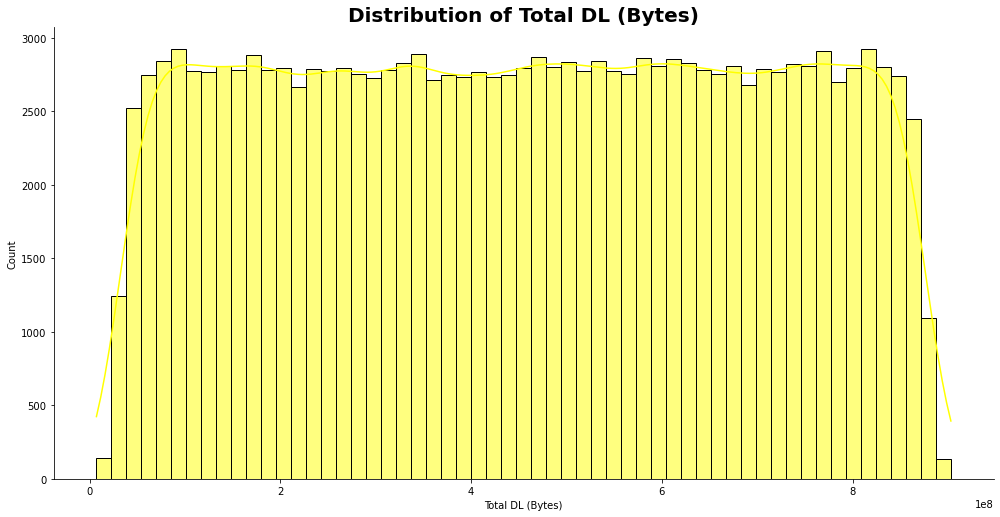

In [201]:
plot_hist(dfExp, "Total DL (Bytes)", "yellow")

In [202]:
# this function converts bytes into megabytes
# it accepts df, and a column with byte values
# returned a column which its values are converted into mega bytes

def convert_bytes_to_megabytes(df, bytes_data):

        megabyte = 1*10e+5
        megabyte_col = df[bytes_data] / megabyte

        return megabyte_col

In [203]:
df_clean['social_media'] = convert_bytes_to_megabytes(df_clean, 'social_media')

df_clean['google'] = convert_bytes_to_megabytes(df_clean, 'google')

df_clean['email'] = convert_bytes_to_megabytes(df_clean, 'email')

df_clean['youtube'] = convert_bytes_to_megabytes(df_clean, 'youtube')

df_clean['netflix'] = convert_bytes_to_megabytes(df_clean, 'netflix')

df_clean['gaming'] = convert_bytes_to_megabytes(df_clean, 'gaming')

df_clean['total_data'] = convert_bytes_to_megabytes(df_clean, 'total_data')


In [204]:
total_data =df_clean[['MSISDN/Number', 'social_media', 'google', 'email', 'youtube', 'netflix',
                                 'gaming', 'total_data', 'Handset Manufacturer']]
total_data_agg = total_data.groupby('MSISDN/Number').sum()
total_data_agg


,social_media,google,email,youtube,netflix,gaming,total_data
MSISDN/Number,,,,,,,
"33,601,001,722.00",2.23,4.39,1.33,21.62,27.18,812.46,72.11
"33,601,001,754.00",2.66,5.33,3.31,12.43,11.22,119.75,72.21
"33,601,002,511.00",3.20,3.44,3.21,21.33,19.35,538.83,78.61
"33,601,007,832.00",0.28,9.68,2.28,6.98,1.94,391.13,40.66
"33,601,008,617.00",2.91,18.50,3.31,41.53,49.20,"1,314.80",188.56
...,...,...,...,...,...,...,...
"33,789,996,170.00",0.30,7.53,1.01,26.65,14.90,660.36,53.43
"33,789,997,247.00",0.50,5.43,2.51,19.85,8.53,437.00,71.46
"3,197,020,876,596.00",0.72,10.44,1.52,11.96,26.59,178.05,74.59


In [205]:
dfExp["IMSI"].describe()

count               150,001.00
mean    208,201,639,866,698.59
std          21,447,400,231.66
min     204,047,108,489,451.00
25%     208,201,401,263,778.00
50%     208,201,546,330,099.00
75%     208,201,771,619,138.00
max     214,074,303,349,628.00
Name: IMSI, dtype: float64

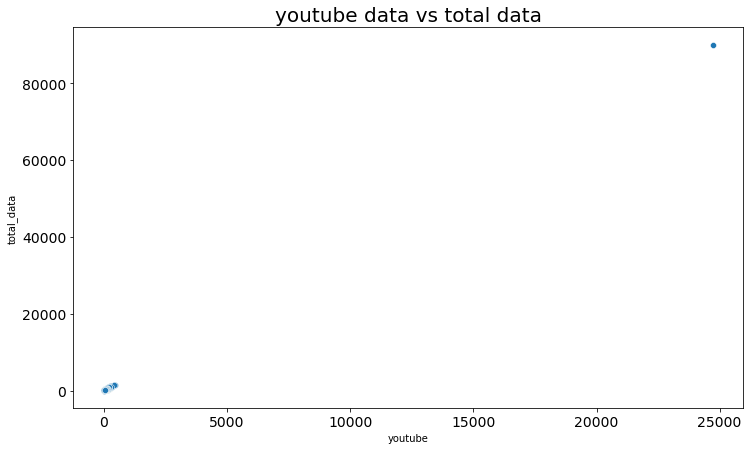

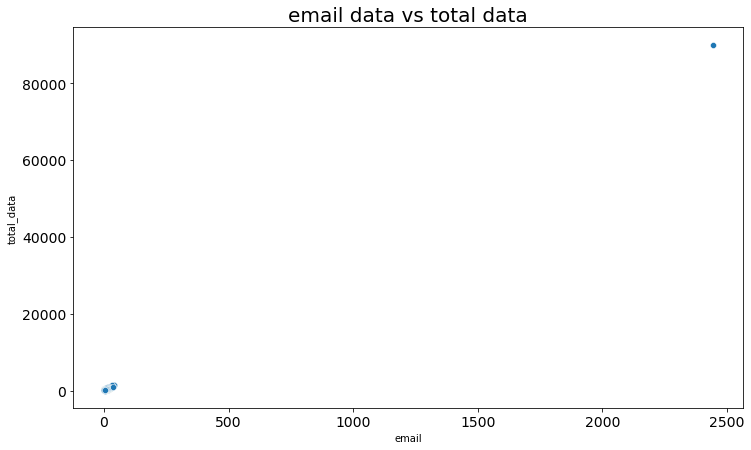

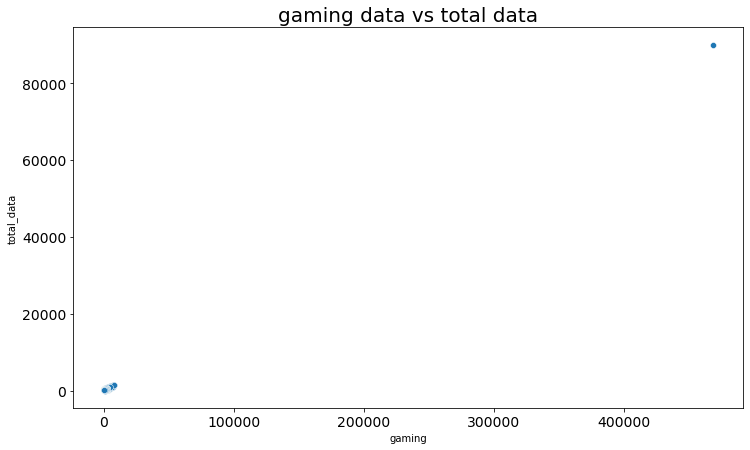

In [206]:
plot_scatter(total_data_agg, 'youtube', 'total_data', 'youtube data vs total data',  None,  None)
plot_scatter(total_data_agg, 'email', 'total_data', 'email data vs total data',  None,  None)
plot_scatter(total_data_agg, 'gaming', 'total_data', 'gaming data vs total data',  None,  None)

In [212]:
social_media_total = total_data.sum()[0]
google_total = total_data.sum()[1]
email_total = total_data.sum()[2]
youtube_total = total_data.sum()[3]
netflix_total = total_data.sum()[4]
gaming_total = total_data.sum()[5]
other = total_data.sum()[6]


app_total_count_df = pd.DataFrame(columns=['app', 'total'])
app_total_count_df['app'] = ['social_media', 'google', 'email', 'youtube', 'netflix', 'gaming', 'other']

app_total_count_df['total'] = [social_media_total, google_total, email_total, youtube_total, netflix_total, gaming_total, other]
app_total_count_df

,app,total
0,social_media,"6,273,663,386,779,266.00"
1,google,"274,239.36"
2,email,"1,171,101.99"
3,youtube,"338,867.61"
4,netflix,"3,396,545.04"
5,gaming,"3,394,313.61"
6,other,"64,550,395.44"


In [213]:
from sklearn.preprocessing import MinMaxScaler

# I scaled the duration by dividing it to 1000 to easily
# compare it with total data which has already been converted to megabytes
# code credit Daniel

scaled_explore_feature_df = df_clean[['Dur. (ms)', 'total_data', 'MSISDN/Number']]

scaled_explore_feature_df['Dur. (ms)'] = df_clean['Dur. (ms)']/1000
scaled_explore_feature_df = scaled_explore_feature_df.rename(columns={'Dur. (ms)': 'duration'})

scaled_explore_feature_df_agg = scaled_explore_feature_df.groupby('MSISDN/Number').agg({'duration':'sum', 'total_data': 'sum'})

deciles = pd.qcut(scaled_explore_feature_df_agg['duration'], 5, labels=["1st_decile", "2nd_decile",
                                                      "3rd_decile", "4th_decile",
                                                      "5th_decile"])



explore_feature_df_with_decile = scaled_explore_feature_df_agg.copy()

explore_feature_df_with_decile['decile'] = deciles

explore_feature_df_with_decile_agg = explore_feature_df_with_decile.groupby('decile').agg({'total_data': 'sum',
                                                                                           'duration': 'sum'})
explore_feature_df_with_decile_agg




<ipython-input-213-10073449784c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_explore_feature_df['Dur. (ms)'] = df_clean['Dur. (ms)']/1000


,total_data,duration
decile,,
1st_decile,"1,909,485.92","644,345.11"
2nd_decile,"2,088,855.92","1,807,896.02"
3rd_decile,"1,921,035.51","2,124,982.92"
4th_decile,"2,315,916.75","3,448,609.66"
5th_decile,"4,101,127.05","7,665,548.25"


<Figure size 720x504 with 0 Axes>

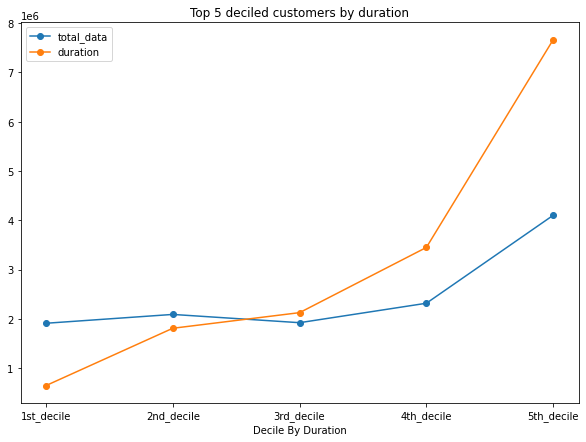

In [214]:
plt.figure(figsize=(10,7))
explore_feature_df_with_decile_agg.plot(linestyle='-', marker='o', figsize=(10,7),
                                        title='Top 5 deciled customers by duration').set_xlabel("Decile By Duration")
plt.xticks(np.arange(len(explore_feature_df_with_decile_agg.index)), explore_feature_df_with_decile_agg.index)

plt.show()

In [215]:
def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

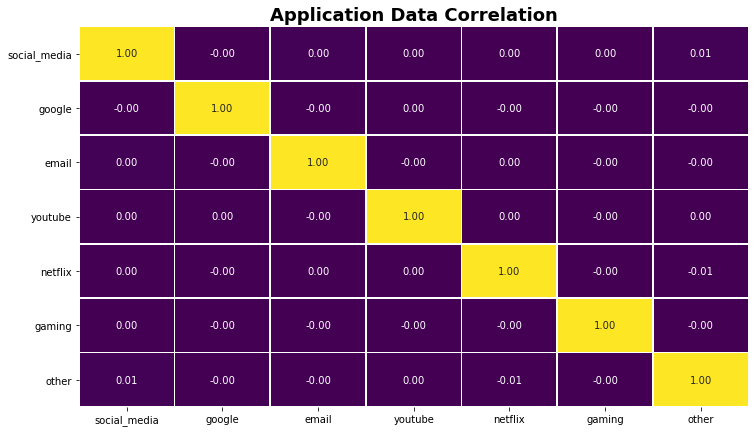

,social_media,google,email,youtube,netflix,gaming,other
social_media,1.00,-0.00,0.00,0.00,0.00,0.00,0.01
google,-0.00,1.00,-0.00,0.00,-0.00,-0.00,-0.00
email,0.00,-0.00,1.00,-0.00,0.00,-0.00,-0.00
youtube,0.00,0.00,-0.00,1.00,0.00,-0.00,0.00
netflix,0.00,-0.00,0.00,0.00,1.00,-0.00,-0.01
gaming,0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.00
other,0.01,-0.00,-0.00,0.00,-0.01,-0.00,1.00


In [217]:
total_data_2 = df_clean[['social_media', 'google', 'email', 'youtube', 'netflix',
                                 'gaming',  'other']]
data_correlation = total_data_2.corr()
plot_heatmap(data_correlation, 'Application Data Correlation')
data_correlation